# antBot Highway Forest Creation

In [42]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as P
import seaborn as sns
import cv2

# Plotting settings
sns.set_context("notebook", font_scale = 1.5)
sns.set_style("dark")
sns.set_palette("deep", 12)
# sns.color_palette("Set2")
from ipywidgets import interact, interactive, fixed, interact_manual
cmap='Greys_r'

In [11]:
# Image Operations
Trees = np.genfromtxt('../worlds/forest/highway_overtake/1.forest', delimiter=',')
print(Trees.shape)

(400, 3)


## Inspect (Sample) Forest

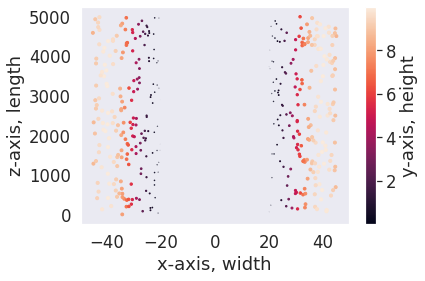

In [41]:
P.scatter(Trees[:,0],Trees[:,2],s=Trees[:,1],c=Trees[:,1]); # size (and Color) is tree height. # They are randomly distributed in a certain rule. We need to add more.
P.xlabel('x-axis, width')
P.ylabel('z-axis, length')
cbar=P.colorbar();
cbar.ax.set_ylabel('y-axis, height');

## Create (Extrapolate) More Trees

In [55]:
N0 = len(Trees)
x0Max, x0Min = -23, -44.97
x1Max, x1Min = 44.89, 23
yMax , yMin  = 9.99, 1
zMax , zMin  = 4994.89, 0.5

In [75]:
N1 = 1000 # Total 
N = N1-N0
UniCoords = np.random.rand(N,3) # uniformly distributed coordinates in [0,1]. Half of them will be on the right, half on the left
UniCoords0 = UniCoords[:N//2]
UniCoords1 = UniCoords[N//2:]

x0 = np.random.uniform(low=x0Min, high=x0Max, size=(N//2,))
x1 = np.random.uniform(low=x1Min, high=x1Max, size=(N//2,))
y  = np.random.uniform(low=yMin , high=yMax , size=(N,))
z  = np.random.uniform(low=zMin , high=zMax , size=(N,))
UniCoords0 = np.vstack((x0, y[:N//2], z[:N//2])).T
UniCoords1 = np.vstack((x1, y[N//2:], z[N//2:])).T

(300, 3)

In [79]:
Trees1 = np.vstack((Trees, UniCoords0, UniCoords1))
Trees1.shape

(1000, 3)

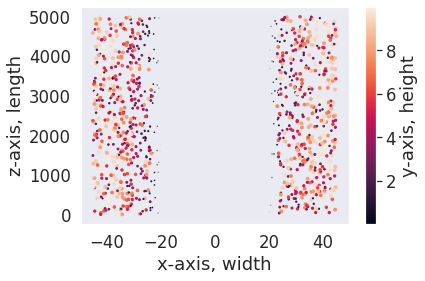

In [80]:
Trees1 = np.vstack((Trees, UniCoords0, UniCoords1))
P.scatter(Trees1[:,0],Trees1[:,2],s=Trees1[:,1],c=Trees1[:,1]); # size (and Color) is tree height. # They are randomly distributed in a certain rule. We need to add more.
P.xlabel('x-axis, width')
P.ylabel('z-axis, length')
cbar=P.colorbar();
cbar.ax.set_ylabel('y-axis, height');

In [88]:
np.savetxt('../worlds/forest/highway_overtake/Trees1.forest',Trees1, delimiter=',',fmt='%1.3f')